In [5]:
import csv

# Данные для записи в CSV-файл
data = [
    ['Дата', 'Продажи'],
    ['2024-07-01', 120],
    ['2024-07-02', 150],
    ['2024-07-03', 170],
    ['2024-07-04', 160],
    ['2024-07-05', 180]
]

# Открываем файл для записи, 'w' означает запись, newline='' предотвращает лишние пустые строки
with open('sales.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)  # Создаем объект writer
    writer.writerows(data)  # Записываем все строки данных

print("Файл sales.csv успешно создан.")


Файл sales.csv успешно создан.


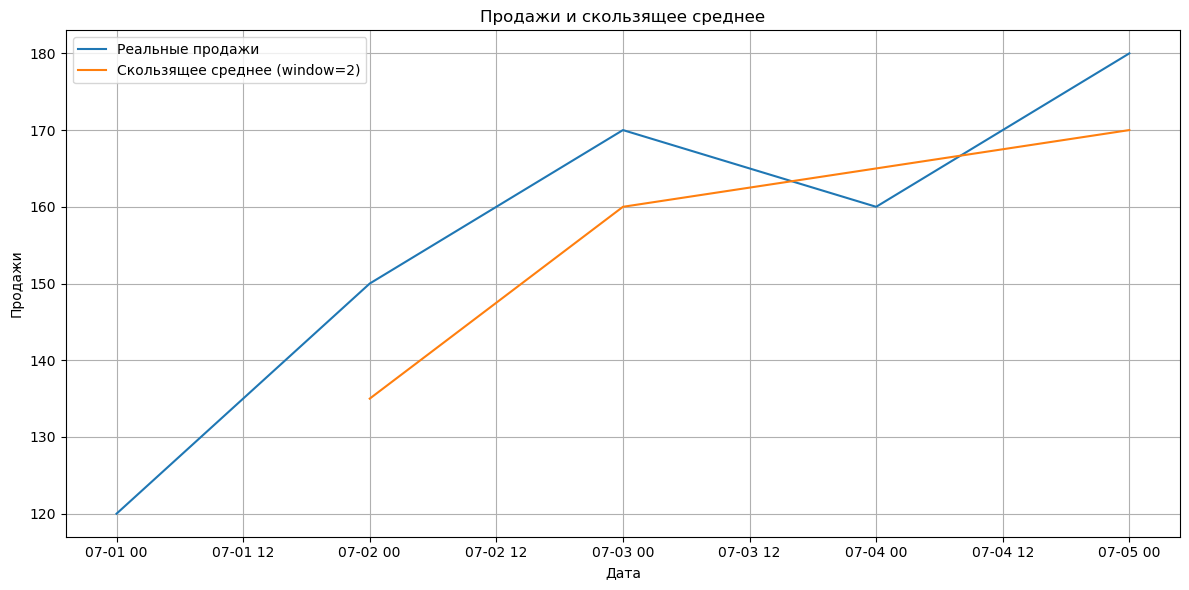

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Чтение данных из CSV-файла
try:
    df = pd.read_csv('sales.csv', encoding='windows-1251')  # Попробуем кодировку windows-1251
except UnicodeDecodeError:
    df = pd.read_csv('sales.csv', encoding='cp1251')  # Если windows-1251 не сработает, пробуем cp1251

# 2. Установка DatetimeIndex
df['Дата'] = pd.to_datetime(df['Дата']) # Преобразуем столбец 'Дата' в формат datetime
df = df.set_index('Дата') # Устанавливаем столбец 'Дата' в качестве индекса

# 3. Расчет скользящего среднего (rolling mean)
rolling_mean = df['Продажи'].rolling(window=2).mean()

# 4. Построение графиков
plt.figure(figsize=(12, 6)) # Создаем фигуру для графиков

# График 1: Реальные продажи
plt.plot(df['Продажи'], label='Реальные продажи')

# График 2: Скользящее среднее
plt.plot(rolling_mean, label='Скользящее среднее (window=2)')

# Добавляем заголовок, подписи осей и легенду
plt.title('Продажи и скользящее среднее')
plt.xlabel('Дата')
plt.ylabel('Продажи')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
